# Bifurcation Analysis

3.1.2, 3.1.4, 3.2.2, 3.2.4, 3.4.4, 3.4.8

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
np.seterr(divide='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

**3.1: Saddle Node Bifurcation** 

In [3]:
def plot_qualitative_behaviour(f, r_values, n_arrows, xmin, xmax, h=0.1, levels=0):
    xrange = np.linspace(xmin, xmax, n_arrows)
    head_width = len(r_values) / 40
    rmin, rmax = min(r_values), max(r_values)
    XX = np.mgrid[xmin:xmax+h:h, rmin:rmax+h:h]
    Z = np.apply_along_axis(lambda xx: f(*xx), 0, XX)
    for r in r_values:
        flows = np.sign(f(x=xrange, r=r))
        for x, flow_value in zip(xrange, flows):
            color = "tab:red" if flow_value == -1 else "tab:orange"
            plt.axhline(y=r, c="tab:gray", linestyle="--", alpha=0.02)
            plt.arrow(x, r, flow_value * 0.2, 0, width=0.001, head_width=head_width,
                          color=color, head_length=0.1)
    plt.contour(*XX, Z, levels=levels)
    plt.ylabel("r", fontsize=15)
    plt.xlabel("x", fontsize=15)

Text(0.5, 1.0, 'Bifurcation Diagram')

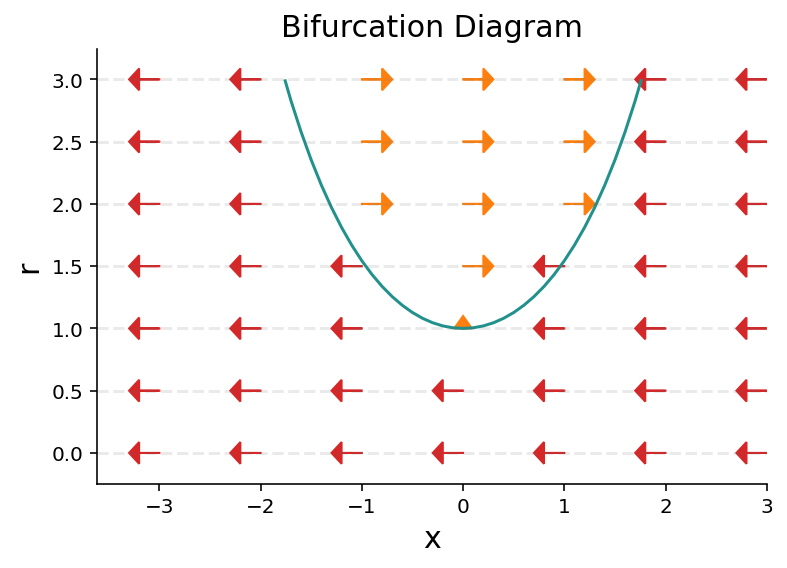

In [73]:
def f(x, r):
    return r - np.cosh(x)
r_values = np.arange(0, 3.5, 0.5)
plot_qualitative_behaviour(f, r_values, 7, -3, 3, h=0.1)
plt.title("Bifurcation Diagram", fontsize=15)

Consider the following system

$$
\dot x = r + \frac{1}{2}x - \frac{x}{ 1+ x}\\
$$

Note that
$$
\begin{aligned}
    f_r(x) &= r + \frac{1}{2}x - \frac{x}{ 1+ x}\\
           &= r + x\left(\frac{1}{2} - \frac{1}{1 + x}\right)\\
           &= r + \frac{x}{2}\left[\frac{x-1}{x+1}\right]
\end{aligned}
$$

Hence, $\forall r\in\mathbb{R}$,

$$
    f_r(x) \xrightarrow[x\to\infty]{} \infty
$$

and

$$
    f_r(x) \xrightarrow[x\to-\infty]{} \infty
$$

In [89]:
xstar = -1 + np.sqrt(2)
rc = -(-1 + np.sqrt(2)) * (-2 + np.sqrt(2)) / (2 * np.sqrt(2))

In [94]:
x_stars = -1 + np.array([-1, 1]) * np.sqrt(2)
r_cs = (3 + np.array([1, -1]) * 2 * np.sqrt(2)) / 2

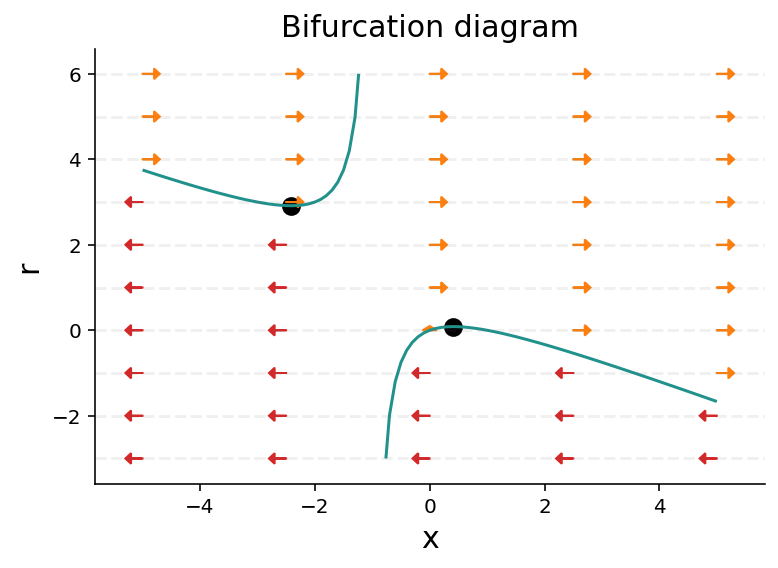

In [102]:
def f(x, r):
    return r + x * (x - 1) / (2 * (x + 1))
    return r + x / 2 - x / (1 + x)

plt.scatter(x_stars, r_cs, c="black", s=70)
r_values = np.arange(-3, 7, 1)
plot_qualitative_behaviour(f, r_values, 5, -5, 5, h=0.1)
plt.title("Bifurcation diagram", fontsize=15);

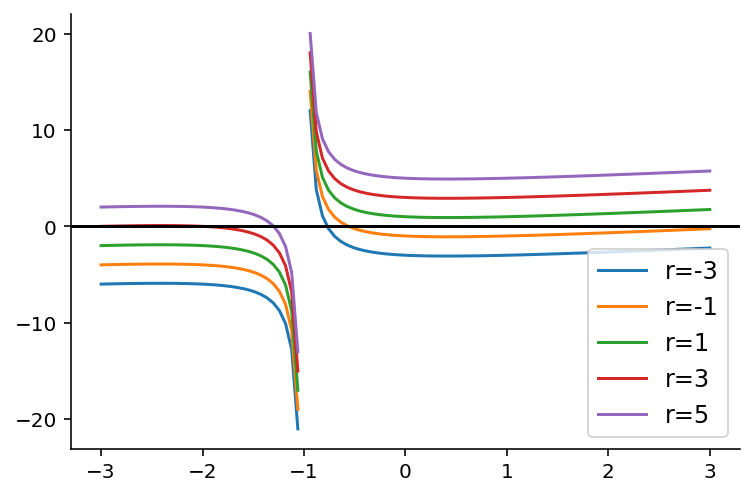

In [95]:
xrange = np.linspace(-3, 3, 100)
for r in r_values[::2]:
    plt.plot(xrange, f(xrange, r), label=f"r={r}")
plt.axhline(y=0, c="black")
plt.legend(fontsize=12)

From the bifurcation diagram above, we can see that the system does **not** go through a saddle-node bifurcation

**3.2: Transcritical Bifurcation** 

Text(0.5, 1.0, 'Bifurcation diagram')

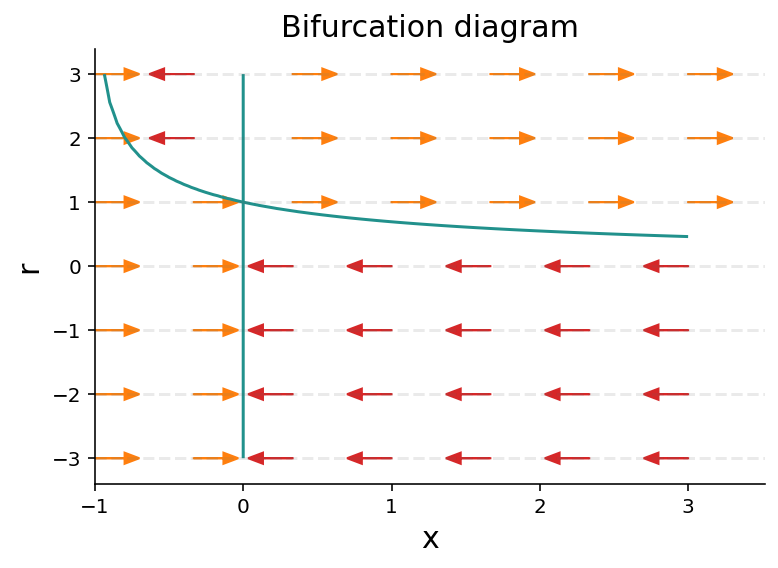

In [36]:
def f(x, r):
    return r * x - np.log(1 + x)

r_values = np.arange(-3, 4, 1)
plot_qualitative_behaviour(f, r_values, 7, -1, 3, h=0.05)
plt.title("Bifurcation diagram", fontsize=15)

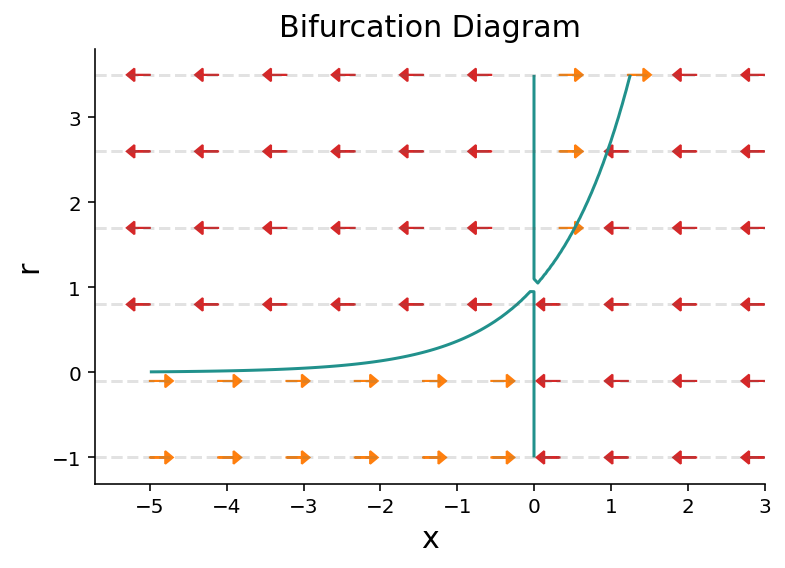

In [71]:
def f(x, r):
    return x * (r - np.exp(x))

r_values = np.arange(-1, 4, 0.9)
plot_qualitative_behaviour(f, r_values, 10, -5, 3, h=0.05)
plt.title("Bifurcation Diagram", fontsize=15);

**3.4: Pitchfork Bifurcation** 

Text(0.5, 1.0, 'Bifurcation Diagram')

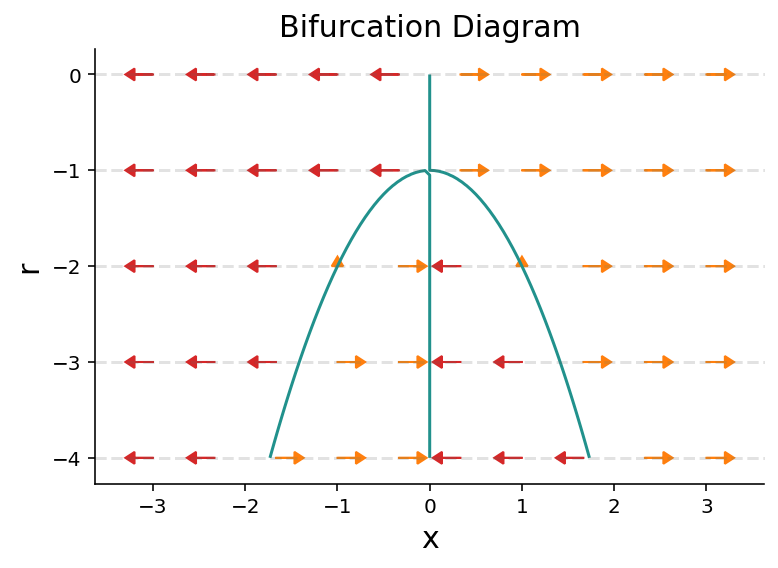

In [76]:
def f(x, r):
    return x + r * x / (1 + x ** 2)

r_values = np.arange(-4, 1, 1)
plot_qualitative_behaviour(f, r_values, 10, -3, 3, h=0.05)
plt.title("Bifurcation Diagram", fontsize=15)

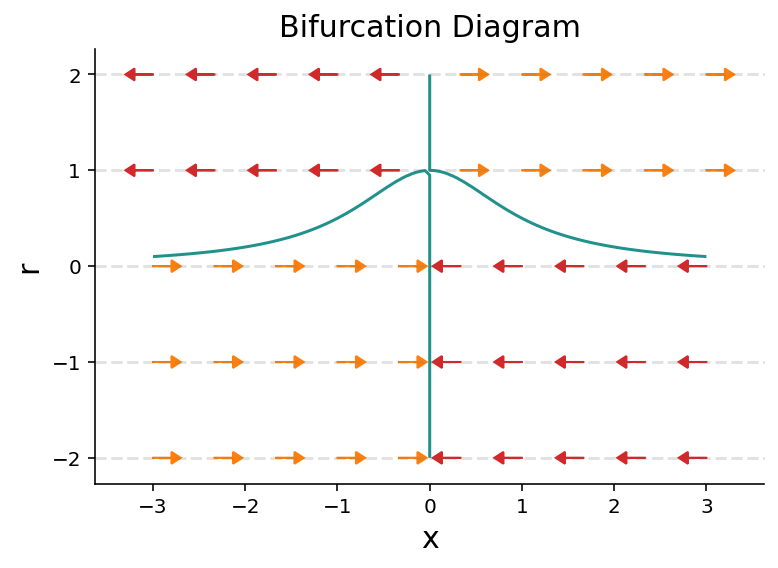

In [75]:
def f(x, r):
    return r * x -  x / (1 + x ** 2)

r_values = np.arange(-2, 3, 1)
plot_qualitative_behaviour(f, r_values, 10, -3, 3, h=0.05)
plt.title("Bifurcation Diagram", fontsize=15);